###**Exploring two or more variables**

##The correlation analysis performed in the previous chapter is actually limited to finding the correlation between two variables only(also known as bi-variate analysis). In order to perform multi-variate analysis, we discuss some mathematical approaches in this chapter.

##Some of the techniques for the same we look at additional estimates and plots, and at more than two variables (multivariate analysis):

1. Contingency table - A tally of counts between two or more categorical variables.

2. Hexagonal binning - A plot of two numeric variables with the records binned into hexagons.

3. Contour plot - A plot showing the density of two numeric variables like a topographical map.

4. Violin plot - Similar to a boxplot but showing the density estimate.

In [5]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns


print(datasets.load_wine().DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [7]:
wine_data = pd.DataFrame(datasets.load_wine().data)
wine_data.columns = datasets.load_wine().feature_names
wine_data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


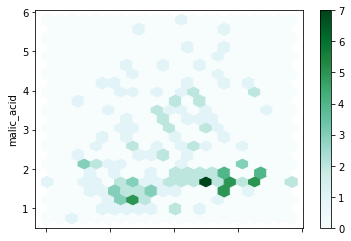

In [ ]:
#plotting the hexagonal binning plot for alcohol and malic_acid columns

ax = wine_data.plot.hexbin(x = 'alcohol', y = 'malic_acid', gridsize= 20)

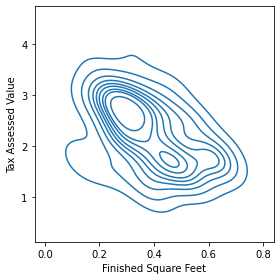

In [9]:
#plotting contour plot
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=wine_data.sample(100), x='nonflavanoid_phenols', y='total_phenols', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()




##Plotting boxplots and violin plots using a different dataset.

In [10]:
#load the dataset
d2 = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv?raw=true")
d2.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


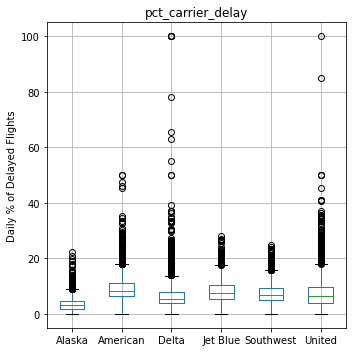

In [11]:
# This method is used to compute a simple cross-tabulation of two (or more) factors.
# plotting the bar plot
ax = d2.boxplot( column='pct_carrier_delay',figsize=(5, 5), by='airline')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

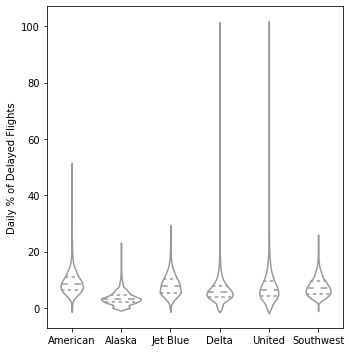

In [12]:
# plotting the violin plot for the data
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=d2, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()